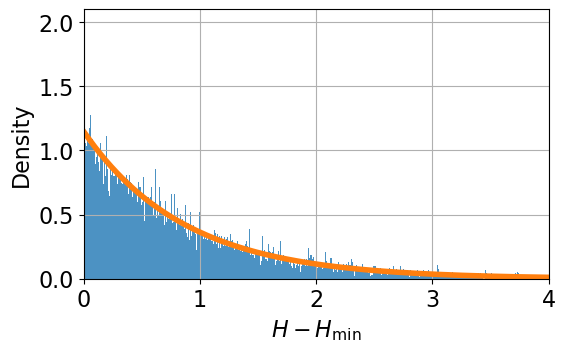

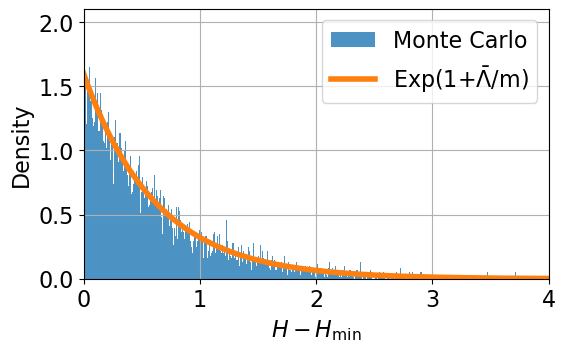

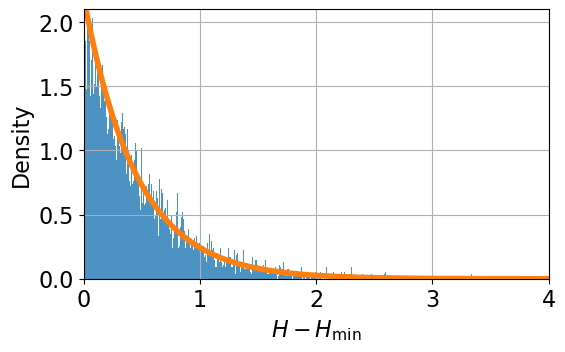

In [1]:
import numpy as np
from scipy.special import psi, polygamma
from scipy.stats import dirichlet
import matplotlib.pyplot as plt

lam_list = np.array([[1,1,1],[2, 5, 5],[2, 2, 20]])
m = 20

for j in range(3):
    lam = lam_list[j,:]
    
    n = m * lam / np.sum(lam)
    alpha = n + lam
    
    K = len(alpha)
    num_samples = 20000  # Number of Monte Carlo samples
    
    # Calculate mean and variance of log P_i
    
    # Calculate mean of H
    mean_H = np.sum(n * (psi(alpha) - psi(np.sum(alpha))))
    
    # Calculate variance of H without simplification
    alpha_0 = np.sum(alpha)
    
    # Define u
    H_upper_bound = np.sum(n * np.log(n)) - np.sum(n) * np.log(np.sum(n))
    
    # Analytical mean and variance of u - H
    mean_u_minus_H_analytical = H_upper_bound - mean_H

    # Calculate the parameter for the Exponential distribution
    lambda_exponential = (1 + np.sum(lam) / m)
    
    # Generate samples from the Dirichlet distribution
    samples_dirichlet = dirichlet.rvs(alpha, size=num_samples)
    
    # Compute H for each sample
    H_samples = np.sum(n * np.log(samples_dirichlet), axis=1)
    u_minus_H_samples = H_upper_bound - H_samples
    
    # Empirical mean and variance of u - H from simulation
    mean_u_minus_H_simulation = np.mean(u_minus_H_samples)
    var_u_minus_H_simulation = np.var(u_minus_H_samples)
    
    # Plot the histogram of the samples
    plt.figure(figsize=(6, 3.5))
    plt.grid(True)
    # Histogram for Monte Carlo simulation of u - H
    plt.hist(u_minus_H_samples, bins=2000, density=True, alpha=0.8, color='tab:blue', label='Monte Carlo')
    
    x = np.linspace(0, 6, 1000)
    pdf_exponential = lambda_exponential * np.exp(-lambda_exponential * x)
    plt.plot(x, pdf_exponential, 'tab:orange', lw=4, label= r'Exp(1+$\bar{\Lambda}$/m)')
    
    plt.xlabel('$H - H_{\min}$',fontsize=16)
    plt.xlim([0, 4])
    plt.ylim([0, 2.1])
    plt.ylabel('Density',fontsize=16)
    if j==1:
        plt.legend(fontsize=16)
    #else:
     #   plt.legend()
    plt.xticks(np.arange(0, 4.2, 1), fontsize=16)
    plt.yticks(np.arange(0, 2.1, 0.5), fontsize=16)
    plt.savefig('H_distribution_'+str(lam[0])+'_'+str(lam[1])+'_'+str(lam[2])+'.png', dpi=100, bbox_inches='tight')
    plt.show()